In [71]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [72]:
def function(x):
    return(np.cos(x))

specify moundaries, a number of points, amd a tolerance

In [73]:
xmin = 0.
xmax = float(1.75)
n = 10             #n doesn't have to be very big
tol = 0.01

X=np.linspace(xmin,xmax,n)

give the actual answer to the intgral to improve tha accuracy later

In [74]:
real_answer = np.sin(1.75)-np.sin(0)
print(real_answer)

0.9839859468739369


In [75]:
def boundaryFinder(func):
    y=func
    ymin=y[0]
    ymax=[-1]
    for i in range(len(y)):
        if(ymin>y[i]):
            ymin=y[i]
        elif(ymax<y[i]):
            ymax=y[i]
    return ymin,ymax

In [76]:
def genetarator(xmin,xmax,ymin,ymax,n):
    ymin,ymax=boundaryFinder(function(X))
    x=np.random.uniform(xmin,xmax,n)
    y=np.random.uniform(ymin,ymax,n)
    return x,y

In [77]:
ymin,ymax=boundaryFinder(function(X))
x,y = genetarator(xmin,xmax,ymin,ymax,n)
ir = np.where((y)<function(x))[0]
ur = np.where((y)>=function(x))[0]
imax=int(1/tol)

In [78]:
def integrate(xmin,xmax,n,ir):
    ymin,ymax=boundaryFinder(function(X))
    area=(xmax-xmin)*(ymax-ymin)
    #check=[]
    #xs=[]
    #ys=[]
    #for i in range(n):
        #x=np.random.uniform(xmin,xmax,1)
        #xs.append(x)
        #y=np.random.uniform(ymin,ymax,1)
        #ys.append(y)
        #if abs(y)>abs(function(x)) or y<0:
            #check.append(0)
        #else:
            #check.append(1)
    #print("x boundaries" , xmin,xmax, "y boundaries" , ymin,ymax)
    #ans=(np.mean(check)*area)
    x,y = genetarator(xmin,xmax,ymin,ymax,n)
    ir = np.where((y)<function(x))[0]
    ans=0.8*area*len(ir)/float(n)
    return ans
print(integrate(xmin,xmax,n,ir))

1.319635582327431


In [79]:
def plot(xmin,xmax,x,y,ur,ir,n):
    fig = plt.figure(figsize=(7,7))
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.plot(x[ir],y[ir],'.',color='blue',label = "points below")
    plt.plot(x[ur],y[ur],'.',color="0.75", label = "points above")
    xc = X
    yc = function(xc)
    plt.plot(xc,yc,color='green',label = "f(x)")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc=1,framealpha=0.95)
    plt.show()

In [80]:
def monteCarloWrap(n,tol,imax):
    i=0
    N=n
    x,y = genetarator(xmin,xmax,ymin,ymax,N)
    ir = np.where((y)<function(x))[0]
    ur = np.where((y)>=function(x))[0]
    ans=integrate(xmin,xmax,N,ir)
    while(abs(real_answer-ans)>tol and i<imax):
        i+=1
        N+=1
        ans=integrate(xmin,xmax,N,ir)
        print(ans)
    if(imax==i):
        print("answer=",ans)
        print("The maximum number of iterations has been reached",i)
    else:
        print("answer=",ans)
        print("This is how many iterations it took:",i)
    print("Number of points=",N)
    error_monte = np.abs(ans - real_answer)
    print("error =" ,error_monte)
    x,y = genetarator(xmin,xmax,ymin,ymax,N)
    ir = np.where((y)<function(x))[0]
    ur = np.where((y)>=function(x))[0]
    plot(xmin,xmax,x,y,ur,ir,N)
    integrate(xmin,xmax,N,ir)
    return ans

x boundaries 0.0 1.75 y boundaries -0.17824605564949209 1.0
real answer= 0.9839859468739369
0.8997515334050668
1.0996963186061925
0.8882162573357709
1.060421450084543
0.7697874230243348
1.2371583584319668
0.9703202811231111
0.9164135988384938
1.0418175649953405
1.1546811345365022
1.1782460556494923
0.8247722389546444
1.0757898768973624
0.8935032588675315
0.725799570280087
0.9516602757168975
1.2829790383738913
1.1193337528670175
1.0807360372509134
1.044711502675883
0.9045889072405777
0.8763205038893097
1.0996963186061925
0.9703202811231111
0.9425968445195937
1.2371583584319668
1.0253925132949635
1.1286356954116188
1.0574003063521082
1.319635582327431
1.1265181800356119
0.9818717130412434
answer= 0.9818717130412434
This is how many iterations it took: 32
Number of points= 42
error = 0.0021142338326934906


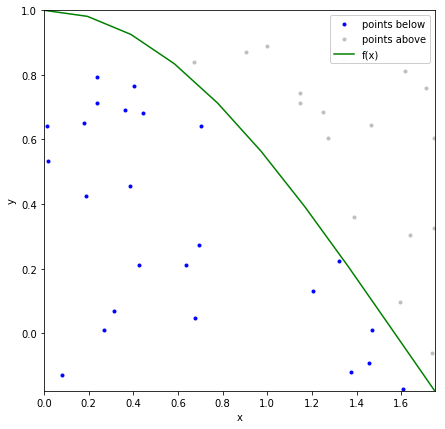

0.9818717130412434

In [81]:
print("x boundaries" , xmin,xmax, "y boundaries" , ymin,ymax)
print("real answer=",real_answer)
monteCarloWrap(n,tol,imax)